Random Forrest

In [122]:
#Reference
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [123]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [124]:
df=pd.read_csv('df_vars_modeling_dpto_final.csv')
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,53.58,69.22,14.20,19284530.0,137.67,7413.78,2826.54,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,2.899358e+10,3.792763e+10,6.692121e+10,0.927392
1,2016,8,8000,43.68,69.85,4.58,15495126.0,110.62,375.66,110.23,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,7.331300e+09,1.556075e+10,2.289205e+10,0.975304
2,2016,11,11001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,3.916084e+09,2.094678e+10,2.486286e+10,0.956000
3,2016,13,13000,38.87,64.78,2.14,14570452.0,104.02,1370.43,704.02,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,3.540095e+10,1.586348e+10,5.126443e+10,0.790543
4,2016,15,15000,49.53,67.63,1.28,18520460.0,132.21,2639.78,1694.06,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,3.204076e+10,1.176500e+10,4.380576e+10,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2019,91,91000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.359497,4.000000,1.215633,67.000000,21.257215,30.873500,1.603067e+10,3.729666e+08,1.640363e+10,0.928500
128,2019,94,94000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.191442,3.000000,0.918189,89.000000,27.239617,46.020164,NaN,1.536149e+08,NaN,1.000000
129,2019,95,95000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.101595,8.500000,4.593769,37.250000,10.793312,50.933432,1.326215e+10,3.277060e+08,1.358986e+10,0.907500
130,2019,97,97000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.340422,1.333333,1.410219,30.333333,27.290174,45.854152,5.304861e+09,6.092396e+07,5.365785e+09,0.731333


In [125]:
#Thousands of millions
#Columns Conectividad, 

In [126]:
df['conectividad']=df['conectividad'].div(1000000)
df['transformacion']=df['transformacion'].div(1000000)
df['inversion_total']=df['inversion_total'].div(1000000)


In [127]:
#Drop NA

In [128]:
df=df.dropna()
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,53.58,69.22,14.20,19284530.0,137.67,7413.78,2826.54,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,28993.584809,37927.628209,66921.213018,0.927392
1,2016,8,8000,43.68,69.85,4.58,15495126.0,110.62,375.66,110.23,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,7331.299662,15560.753305,22892.052967,0.975304
3,2016,13,13000,38.87,64.78,2.14,14570452.0,104.02,1370.43,704.02,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,35400.953680,15863.477702,51264.431382,0.790543
4,2016,15,15000,49.53,67.63,1.28,18520460.0,132.21,2639.78,1694.06,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,32040.758978,11764.999577,43805.758555,0.886130
5,2016,17,17000,50.53,70.06,1.67,13938601.0,99.50,1444.44,232.17,...,9.064444,7.962963,2.106296,27.777778,5.685926,50.502963,16298.836317,10824.148421,27122.984738,0.923815
6,2016,18,18000,44.73,59.89,0.31,7576172.0,54.08,549.83,17.45,...,13.487500,8.875000,2.468125,31.625000,5.510625,44.633750,18839.315192,4330.740260,23170.055452,0.727563
7,2016,19,19000,43.64,63.97,1.00,11545922.0,82.42,2035.92,370.26,...,11.808333,13.000000,4.167857,32.976190,6.186429,43.653571,84610.450272,11330.059335,95940.509607,0.882429
8,2016,20,20000,47.20,70.78,0.73,16319667.0,116.50,1427.51,6650.95,...,12.792000,7.240000,2.262000,13.920000,1.599200,47.553600,11006.565967,8215.707864,19222.273831,0.921920
9,2016,23,23000,44.15,65.84,1.31,8444792.0,60.29,1658.70,246.52,...,6.756000,11.133333,1.798000,51.666667,6.322000,43.862000,46318.475447,31867.082300,78185.557747,0.889733
10,2016,25,25000,52.64,68.40,2.82,19665064.0,140.38,7212.42,527.56,...,2.866207,3.887931,1.080862,12.456897,3.597414,52.752845,25167.913626,26869.848377,52037.762003,0.863784


In [129]:
#PREPARE RANDON FORREST MODEL
max=df['mdm'].max()
min=df['mdm'].min()
avg=(max+min)/2
#print(df['mdm'].max())
#print(df['mdm'].min())
print(avg)
# UPDATE MDM TO LIKER SCALE
# 30 to 40  -->  1 LOW -
# >40 to 50 -->  2 LOW  
# >50 to 60 -->  3 MID
# >60 to 70 -->  4 HIGH 
# >70 to 80 -->  5 HIGH +

46.09491666666666


In [130]:
# Labels are the values we want to predict
labels = np.array(df['mdm'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('mdm', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [131]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [132]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (37, 96)
Training Labels Shape: (37,)
Testing Features Shape: (13, 96)
Testing Labels Shape: (13,)


In [133]:
#BaseLine
#Average Max - Min
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('mdm')]
# Baseline errors, and display average baseline error
baseline_errors = abs(avg - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  3.62


In [134]:
#We have our goal! If we can’t beat an average error of 3.62 degrees, then we need to rethink our approach.

In [135]:
#Train Model

In [136]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [137]:
#Make Predictions

In [138]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.69 degrees.


In [139]:
#Determine performance metrics

In [140]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.65 %.


In [141]:
#Visualizing a single tree

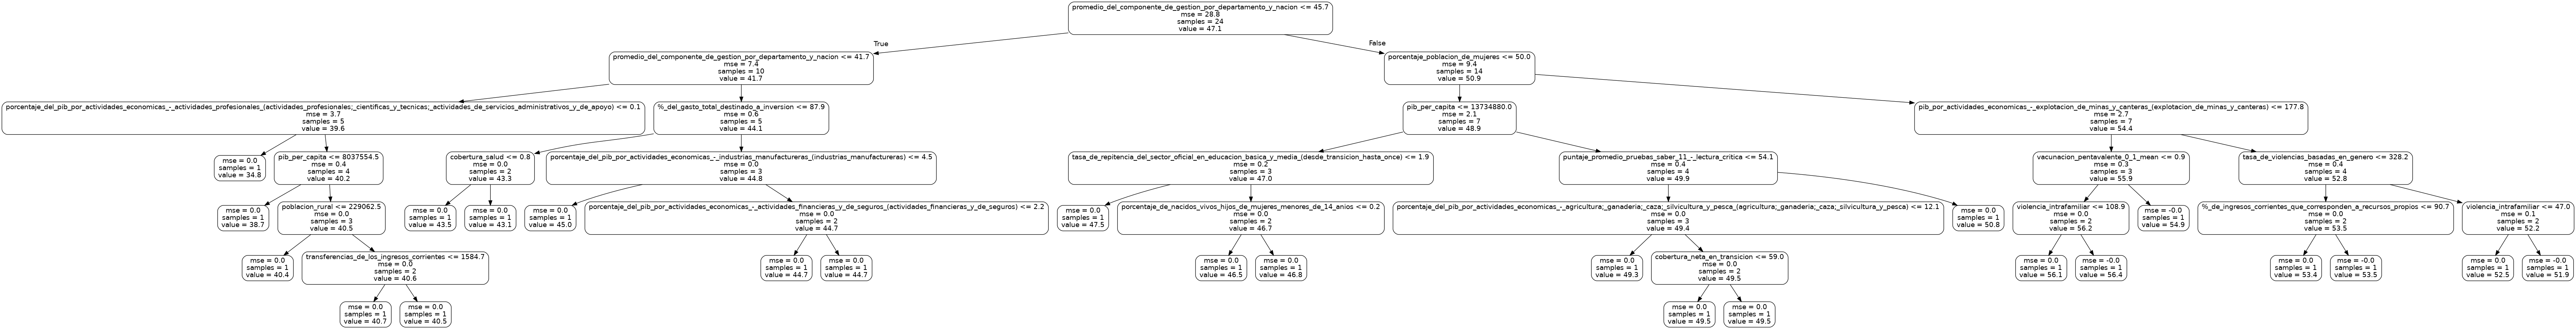

In [142]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(filename='tree.png')

In [143]:
#Depth 3

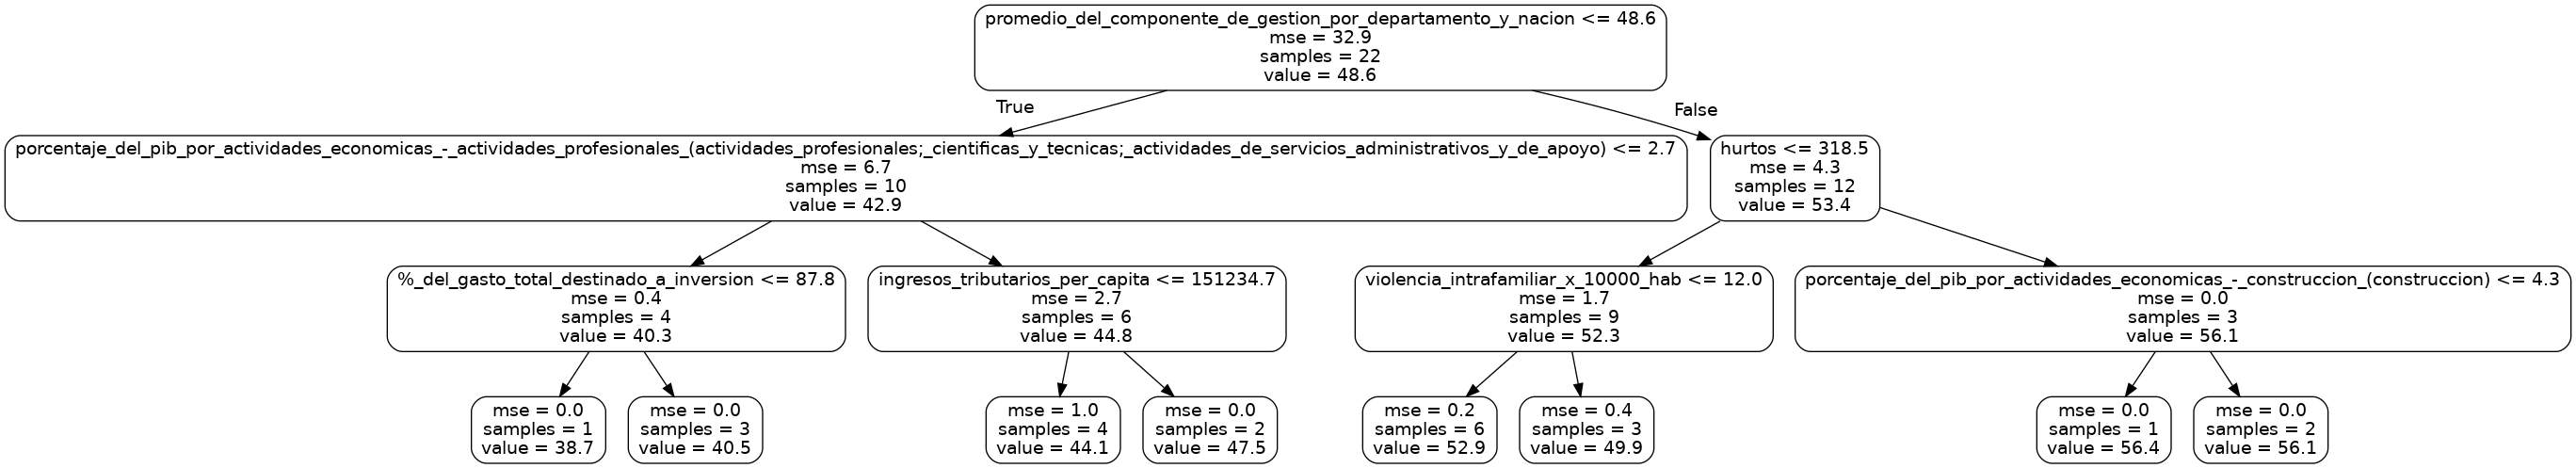

In [144]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
Image(filename='small_tree.png')


#EVERYTIME THIS ROUTINE IS CALLED THE TREE CHANGES!!!


In [145]:
#Variable Importance

In [146]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: promedio_del_componente_de_gestion_por_departamento_y_nacion Importance: 0.75
Variable: ingresos_per_capita_por_impuesto_predial Importance: 0.07
Variable: ingresos_no_tributarios_per_capita Importance: 0.02
Variable: porcentaje_del_pib_por_actividades_economicas_-_administracion_publica_y_defensa_(administracion_publica_y_defensa;_planes_de_seguridad_social_de_afiliacion_obligatoria;_educacion;_actividades_de_atencion_de_la_salud_humana_y_de_servicios_sociales) Importance: 0.01
Variable: cobertura_del_regimen_subsidiado Importance: 0.01
Variable: ingresos_tributarios_per_capita Importance: 0.01
Variable: porcentaje_de_poblacion_de_hombres_de__20-24 Importance: 0.01
Variable: hurtos               Importance: 0.01
Variable: violencia_intrafamiliar_x_10000_hab Importance: 0.01
Variable: vacunacion_pentavalente_0_1_mean Importance: 0.01
Variable: anio                 Importance: 0.0
Variable: codigo_departamento  Importance: 0.0
Variable: codigo_entidad       Importance: 0.0
Var

In [147]:
#Only one importante Variable

In [148]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('promedio_del_componente_de_gestion_por_departamento_y_nacion'), feature_list.index('ingresos_per_capita_por_impuesto_predial')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.42 degrees.
Accuracy: 99.12 %.
